# 1. Multiple Regression
## 1.1

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

In [4]:
elections = pd.read_csv('./us-elections-2016.csv.bz2', '\t')

In [5]:
elections.head()

,fips_code,county,total_2008,dem_2008,gop_2008,oth_2008,total_2012,dem_2012,gop_2012,oth_2012,total_2016,dem_2016,gop_2016,oth_2016,stateFips,state
0,26041,Delta County,19064,9974,8763,327,18043,8330,9533,180,18467,6431,11112,924,26,Michigan
1,48295,Lipscomb County,1256,155,1093,8,1168,119,1044,5,1322,135,1159,28,48,Texas
2,1127,Walker County,28652,7420,20722,510,28497,6551,21633,313,29243,4486,24208,549,1,Alabama
3,48389,Reeves County,3077,1606,1445,26,2867,1649,1185,33,3184,1659,1417,108,48,Texas
4,56017,Hot Springs County,2546,619,1834,93,2495,523,1894,78,2535,400,1939,196,56,Wyoming


In [36]:
elections = elections.drop_duplicates()

In [37]:
elections.shape

(3112, 16)

In [38]:
elections.count()

fips          3112
county        3112
total_2008    3112
dem_2008      3112
gop_2008      3112
oth_2008      3112
total_2012    3112
dem_2012      3112
gop_2012      3112
oth_2012      3112
total_2016    3112
dem_2016      3112
gop_2016      3112
oth_2016      3112
stateFips     3112
state         3112
dtype: int64

In [39]:
county = pd.read_csv('./county-data.csv.bz2')

In [40]:
county.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,NPOPCHG_2010,NPOPCHG_2011,NPOPCHG_2012,NPOPCHG_2013,NPOPCHG_2014,NPOPCHG_2015,NPOPCHG_2016,BIRTHS2010,BIRTHS2011,BIRTHS2012,BIRTHS2013,BIRTHS2014,BIRTHS2015,BIRTHS2016,DEATHS2010,DEATHS2011,DEATHS2012,DEATHS2013,DEATHS2014,DEATHS2015,DEATHS2016,NATURALINC2010,NATURALINC2011,NATURALINC2012,...,GQESTIMATES2013,GQESTIMATES2014,GQESTIMATES2015,GQESTIMATES2016,RBIRTH2011,RBIRTH2012,RBIRTH2013,RBIRTH2014,RBIRTH2015,RBIRTH2016,RDEATH2011,RDEATH2012,RDEATH2013,RDEATH2014,RDEATH2015,RDEATH2016,RNATURALINC2011,RNATURALINC2012,RNATURALINC2013,RNATURALINC2014,RNATURALINC2015,RNATURALINC2016,RINTERNATIONALMIG2011,RINTERNATIONALMIG2012,RINTERNATIONALMIG2013,RINTERNATIONALMIG2014,RINTERNATIONALMIG2015,RINTERNATIONALMIG2016,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RDOMESTICMIG2016,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016
0,40,3,6,1,0,Alabama,Alabama,4779736,4780131,4785492,4799918,4815960,4829479,4843214,4853875,4863300,5361,14426,16042,13519,13735,10661,9425,14231,59689,59066,57939,58906,59034,58556,11086,48817,48372,50845,49693,51407,52405,3145,10872,10694,...,116984,119189,120174,119659,12.454136,12.285098,12.013761,12.179855,12.175613,12.052062,10.185688,10.060860,10.542807,10.274905,10.602563,10.786057,2.268448,2.224238,1.470954,1.904950,1.573049,1.266006,1.004861,0.976510,0.866524,0.978425,1.053925,0.975181,-0.295449,0.086108,0.335703,0.086842,-0.642255,-0.177829,0.709411,1.062617,1.202226,1.065267,0.411670,0.797351
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54742,55255,55027,54792,54977,55035,55416,171,513,-228,-235,185,58,381,151,636,614,574,640,636,631,154,507,560,582,575,475,494,-3,129,54,...,455,455,455,455,11.563952,11.135090,10.453565,11.660851,11.562375,11.425881,9.218433,10.155782,10.599259,10.476546,8.635422,8.945143,2.345519,0.979308,-0.145694,1.184305,2.926953,2.480738,0.327282,0.036271,0.036424,0.109320,0.145439,0.126753,5.836523,-5.331786,-4.607582,2.149969,-2.799695,4.128528,6.163804,-5.295515,-4.571158,2.259290,-2.654256,4.255281
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183199,186653,190403,195147,199745,203690,208563,934,3454,3750,4744,4598,3945,4873,516,2188,2092,2161,2214,2237,2274,532,1825,1882,1903,1989,2080,2113,-16,363,210,...,2296,2333,2339,2341,11.831760,11.096495,11.209960,11.213192,11.089767,11.032060,9.868812,9.982602,9.871612,10.073640,10.311450,10.250987,1.962947,1.113893,1.338348,1.139552,0.778316,0.781074,0.989585,0.933548,1.084165,1.210458,1.274059,1.178888,14.768069,17.679072,21.672935,19.038117,17.311339,19.628723,15.757654,18.612620,22.757100,20.248574,18.585398,20.807611
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27348,27326,27132,26938,26763,26270,25965,-109,-22,-194,-194,-175,-493,-305,70,335,300,283,265,258,253,128,318,293,295,313,319,314,-58,17,7,...,3388,3352,3198,3186,12.254454,11.017665,10.467912,9.869462,9.729791,9.686991,11.632586,10.760586,10.911781,11.657139,12.030245,12.022590,0.621868,0.257079,-0.443869,-1.787676,-2.300454,-2.335599,-0.146322,-0.367255,-0.332902,-0.297946,-0.226274,-0.191443,-1.133994,-7.051306,-7.027927,-4.208488,-16.593442,-9.495549,-1.280316,-7.418561,-7.360829,-4.506434,-16.819716,-9.686991
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,22736,22645,22501,22511,22561,22643,-58,-125,-91,-144,10,50,82,44,266,245,258,254,259,266,34,277,239,281,250,207,237,10,-11,6,...,2224,2241,2255,2252,11.667434,10.797470,11.429584,11.285879,11.492723,11.768870,12.149922,10.533042,12.448500,11.108149,9.185304,10.485798,-0.482488,0.264428,-1.018916,0.177730,2.307419,1.283072,0.438625,0.572927,0.575909,0.799787,0.798722,0.796390,-5.395092,-4.891915,-6.556506,0.088865,0.088747,1.504292,-4.956466,-4.318988,-5.980596,0.888652,0.887469,2.300681


## 1.2

In [69]:
county['fips_code'] = county['STATE'] * 1000 + county['COUNTY']

In [70]:
county.fips_code

0        1000
1        1001
2        1003
3        1005
4        1007
5        1009
6        1011
7        1013
8        1015
9        1017
10       1019
11       1021
12       1023
13       1025
14       1027
15       1029
16       1031
17       1033
18       1035
19       1037
20       1039
21       1041
22       1043
23       1045
24       1047
25       1049
26       1051
27       1053
28       1055
29       1057
        ...  
3163    55131
3164    55133
3165    55135
3166    55137
3167    55139
3168    55141
3169    56000
3170    56001
3171    56003
3172    56005
3173    56007
3174    56009
3175    56011
3176    56013
3177    56015
3178    56017
3179    56019
3180    56021
3181    56023
3182    56025
3183    56027
3184    56029
3185    56031
3186    56033
3187    56035
3188    56037
3189    56039
3190    56041
3191    56043
3192    56045
Name: fips_code, Length: 3193, dtype: int64

In [71]:
county = county.drop_duplicates()

In [72]:
county.shape

(3193, 117)

In [73]:
county.count()

SUMLEV                   3193
REGION                   3193
DIVISION                 3193
STATE                    3193
COUNTY                   3193
STNAME                   3193
CTYNAME                  3193
CENSUS2010POP            3193
ESTIMATESBASE2010        3193
POPESTIMATE2010          3193
POPESTIMATE2011          3193
POPESTIMATE2012          3193
POPESTIMATE2013          3193
POPESTIMATE2014          3193
POPESTIMATE2015          3193
POPESTIMATE2016          3193
NPOPCHG_2010             3193
NPOPCHG_2011             3193
NPOPCHG_2012             3193
NPOPCHG_2013             3193
NPOPCHG_2014             3193
NPOPCHG_2015             3193
NPOPCHG_2016             3193
BIRTHS2010               3193
BIRTHS2011               3193
BIRTHS2012               3193
BIRTHS2013               3193
BIRTHS2014               3193
BIRTHS2015               3193
BIRTHS2016               3193
                         ... 
RDEATH2012               3193
RDEATH2013               3193
RDEATH2014

In [74]:
elections.rename(columns={'fips_code' : 'fips'}, inplace= True)
county.rename(columns={'fips_code' : 'fips'}, inplace= True)

In [76]:
df = elections.merge(county, how='left', on='fips')
df.head()

,fips,county,total_2008,dem_2008,gop_2008,oth_2008,total_2012,dem_2012,gop_2012,oth_2012,total_2016,dem_2016,gop_2016,oth_2016,stateFips,state,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,NPOPCHG_2010,NPOPCHG_2011,NPOPCHG_2012,NPOPCHG_2013,NPOPCHG_2014,NPOPCHG_2015,NPOPCHG_2016,BIRTHS2010,...,GQESTIMATES2013,GQESTIMATES2014,GQESTIMATES2015,GQESTIMATES2016,RBIRTH2011,RBIRTH2012,RBIRTH2013,RBIRTH2014,RBIRTH2015,RBIRTH2016,RDEATH2011,RDEATH2012,RDEATH2013,RDEATH2014,RDEATH2015,RDEATH2016,RNATURALINC2011,RNATURALINC2012,RNATURALINC2013,RNATURALINC2014,RNATURALINC2015,RNATURALINC2016,RINTERNATIONALMIG2011,RINTERNATIONALMIG2012,RINTERNATIONALMIG2013,RINTERNATIONALMIG2014,RINTERNATIONALMIG2015,RINTERNATIONALMIG2016,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RDOMESTICMIG2016,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016
0,26041,Delta County,19064,9974,8763,327,18043,8330,9533,180,18467,6431,11112,924,26,Michigan,50.0,2.0,3.0,26.0,41.0,Michigan,Delta County,37069.0,37069.0,37066.0,36935.0,36838.0,36830.0,36573.0,36407.0,36202.0,-3.0,-131.0,-97.0,-8.0,-257.0,-166.0,-205.0,81.0,...,623.0,623.0,623.0,623.0,10.053918,9.759668,10.533746,10.190319,10.221979,10.467022,12.026865,11.494720,11.212467,11.089465,11.921074,11.734083,-1.972946,-1.735052,-0.678721,-0.899146,-1.699096,-1.267061,0.108107,0.108441,0.162893,0.163481,0.164429,0.165269,-1.081066,-0.975967,-0.434381,-5.939812,-2.822691,-3.966450,-0.972960,-0.867526,-0.271488,-5.776331,-2.658263,-3.801182
1,48295,Lipscomb County,1256,155,1093,8,1168,119,1044,5,1322,135,1159,28,48,Texas,50.0,3.0,7.0,48.0,295.0,Texas,Lipscomb County,3302.0,3302.0,3284.0,3345.0,3457.0,3484.0,3555.0,3553.0,3487.0,-18.0,61.0,112.0,27.0,71.0,-2.0,-66.0,14.0,...,35.0,38.0,40.0,40.0,17.498869,10.291091,13.254574,13.354170,12.661790,12.784091,7.542616,9.114966,9.220573,8.523938,4.220597,5.397727,9.956253,1.176125,4.034001,4.830232,8.441193,7.386364,3.017046,0.882094,0.864429,1.420656,1.688239,1.704545,4.223865,30.285210,6.915430,13.070038,-9.566685,-29.545455,7.240911,31.167304,7.779859,14.490695,-7.878447,-27.840909
2,1127,Walker County,28652,7420,20722,510,28497,6551,21633,313,29243,4486,24208,549,1,Alabama,50.0,3.0,6.0,1.0,127.0,Alabama,Walker County,67023.0,67023.0,67006.0,66661.0,66211.0,65934.0,65564.0,65291.0,64967.0,-17.0,-345.0,-450.0,-277.0,-370.0,-273.0,-324.0,218.0,...,851.0,851.0,851.0,851.0,12.179521,12.433018,11.396572,12.273951,12.273127,12.237252,13.615926,15.458486,15.664611,14.570564,14.351763,14.586436,-1.436405,-3.025468,-4.268039,-2.296613,-2.078637,-2.349184,0.493764,0.511771,0.423777,0.517118,0.534943,0.537395,-4.413954,-4.289843,-0.908093,-3.391687,-3.133239,-2.763746,-3.920190,-3.778072,-0.484316,-2.874568,-2.598296,-2.226351
3,48389,Reeves County,3077,1606,1445,26,2867,1649,1185,33,3184,1659,1417,108,48,Texas,50.0,3.0,7.0,48.0,389.0,Texas,Reeves County,13783.0,13783.0,13815.0,13777.0,13925.0,14126.0,14429.0,14789.0,14921.0,32.0,-38.0,148.0,201.0,303.0,360.0,132.0,43.0,...,3132.0,3131.0,3135.0,3136.0,12.032473,11.046134,12.334676,13.938014,14.169348,14.203972,6.668600,6.497726,8.912338,8.264752,6.913546,6.597105,5.363874,4.548408,3.422338,5.673262,7.255801,7.606866,2.899391,3.465454,3.921429,4.552618,4.654665,4.779536,-11.670049,2.815681,7.486364,10.436001,12.868780,-3.231235,-8.770658,6.281135,11.407793,14.988618,17.523444,1.548300
4,56017,Hot Springs County,2546,619,1834,93,2495,523,1894,78,2535,400,1939,196,56,Wyoming,50.0,4.0,8.0,56.0,17.0,Wyoming,Hot Springs County,4812.0,4812.0,4813.0,4819.0,4843.0,4840.0,4797.0,4745.0,4679.0,1.0,6.0,24.0,-3.0,-43.0,-52.0,-66.0,15.0,...,86.0,86.0,86.0,86.0,11.420266,11.384806,9.914283,10.791740,9.641585,10.398981,14.950166,11.798799,13.425591,15.772543,12.366380,14.643463,-3.529900,-0.413993,-3.511308,-4.980803,-2.724796,-4.244482,1.86877

## 1.3

In [78]:
df.STATE.nunique()

50

In [79]:
df.shape

(3112, 132)

In [82]:
df.count()

fips                     3112
county                   3112
total_2008               3112
dem_2008                 3112
gop_2008                 3112
oth_2008                 3112
total_2012               3112
dem_2012                 3112
gop_2012                 3112
oth_2012                 3112
total_2016               3112
dem_2016                 3112
gop_2016                 3112
oth_2016                 3112
stateFips                3112
state                    3112
SUMLEV                   3111
REGION                   3111
DIVISION                 3111
STATE                    3111
COUNTY                   3111
STNAME                   3111
CTYNAME                  3111
CENSUS2010POP            3111
ESTIMATESBASE2010        3111
POPESTIMATE2010          3111
POPESTIMATE2011          3111
POPESTIMATE2012          3111
POPESTIMATE2013          3111
POPESTIMATE2014          3111
                         ... 
RDEATH2011               3111
RDEATH2012               3111
RDEATH2013

There seem to be values from the county dataset missing in one row

## 1.4

In [83]:
df['dem_percent'] = df['dem_2016'] / df['total_2016'] * 100

In [84]:
df['dem_percent'].shape

(3112,)

There are no missing values of percentage

In [85]:
np.min(df.dem_percent)

3.1446540880503147

In [86]:
np.max(df.dem_percent)

92.84659188217161

In [88]:
np.mean(df.dem_percent)

31.710667663510023

We need to see the maximum and minimum to understand the range of democratic votes by percentage in every fips code

## 1.5

In [90]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Democratic Percentage')

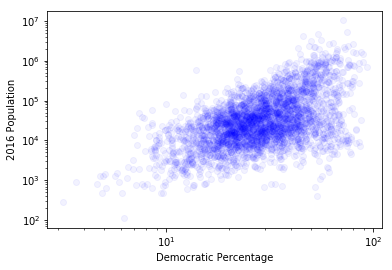

In [104]:
fig = plt.figure()
ax = plt.gca()
ax.scatter(df.dem_percent, df.POPESTIMATE2016, c='blue', alpha=0.05)
ax.set_yscale('log')
ax.set_xscale('log')
plt.ylabel('2016 Population')
plt.xlabel('Democratic Percentage')

The above code is sourced from https://stackoverflow.com/questions/18773662/python-scatter-plot-logarithmic-scale

## 1.6

Text(0.5, 0, 'Democratic Percentage')

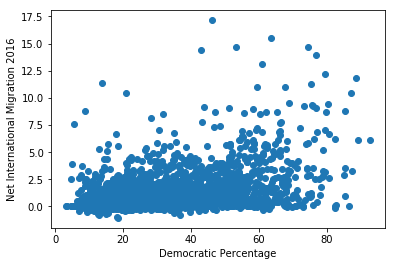

In [105]:
plt.scatter(df.dem_percent, df.RINTERNATIONALMIG2016)
plt.ylabel('Net International Migration 2016')
plt.xlabel('Democratic Percentage')

I think international migration might explain voting preferences because in my experience, immigrants tend to have more liberal views.

In [106]:
r = smf.ols(formula='dem_percent ~ POPESTIMATE2016', data = df).fit()

In [107]:
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            dem_percent   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     433.4
Date:                Sun, 15 Mar 2020   Prob (F-statistic):           3.16e-90
Time:                        13:02:01   Log-Likelihood:                -12703.
No. Observations:                3111   AIC:                         2.541e+04
Df Residuals:                    3109   BIC:                         2.542e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          30.0186      0.270    111.269      0.000      29.490      30.548
POPESTIMATE2016  1.616e-05   7.76e-07     20.819      0.000    1.46e-05    1.77e-05
==============================================================================
Omnibus:                      386.661   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1018.479
Skew:                           0.689   Prob(JB):                    6.92e-222
Kurtosis:                       5.441   Cond. No.                     3.64e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.64e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

According to this model, a fips code area with a population of 0 would have a democratic percentage of 30.02. For every additional person, this percentage increases by 1.616e-05, which is a very small number but makes sense due to the small impact a single vote has. Both of these figures are statistically significant due to the 0 p-values, but it is a poor model due to the low R-squared number. This indicated that very little of the actual data can be explained by the model.

## 1.8

In [108]:
df['log_pop'] = np.log(df.POPESTIMATE2016)

In [109]:
r = smf.ols(formula='dem_percent ~ log_pop', data = df).fit()

In [110]:
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            dem_percent   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     1040.
Date:                Sun, 15 Mar 2020   Prob (F-statistic):          4.59e-197
Time:                        13:06:37   Log-Likelihood:                -12457.
No. Observations:                3111   AIC:                         2.492e+04
Df Residuals:                    3109   BIC:                         2.493e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -21.6521      1.671    -12.955      0.000     -24.929     -18.375
log_pop        5.1860      0.161     32.247      0.000       4.871       5.501
==============================================================================
Omnibus:                      621.986   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1196.532
Skew:                           1.209   Prob(JB):                    1.50e-260
Kurtosis:                       4.839   Cond. No.                         73.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [111]:
np.exp(-21.6521)

3.9501396390265077e-10

In [112]:
np.exp(5.1860)

178.7521125561101

Under this model, the initial value of the democratic percentage given a 0 population is 3.95e-10, which makes much more sense (with no population, there can't really be a democratic percentage of votes). However, for every additional unit of population, the overall democratic percentage increases by 178.75 times. This number sounds large but also makes sense if you consider that the initial value is almost zero. Both of these values are statistically significant given the 0 p-values.

## 1.9

The log-transformed model is a better model due to the higher R-squared value. Although it's R-squared value is also very low, indicating that this model is not a good representation of the data, it is higher than the corresponding value of the simple linear model, indicating that it explains more of the variation in the data.

## 1.10

In [114]:
r = smf.ols(formula='dem_percent ~ POPESTIMATE2016 + NPOPCHG_2016 + DEATHS2016 + INTERNATIONALMIG2016 + DOMESTICMIG2016', data = df).fit()

In [115]:
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            dem_percent   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     99.56
Date:                Sun, 15 Mar 2020   Prob (F-statistic):           1.31e-97
Time:                        13:16:30   Log-Likelihood:                -12675.
No. Observations:                3111   AIC:                         2.536e+04
Df Residuals:                    3105   BIC:                         2.540e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               29.5940      0.282    105.039      0.000      29.042      30.146
POPESTIMATE2016      -2.772e-06   9.49e-06     -0.292      0.770   -2.14e-05    1.58e-05
NPOPCHG_2016            -0.0009      0.001     -1.693      0.091      -0.002       0.000
DEATHS2016               0.0027      0.001      2.868      0.004       0.001       0.004
INTERNATIONALMIG2016     0.0021      0.001      3.571      0.000       0.001       0.003
DOMESTICMIG2016          0.0010      0.001      1.966      0.049    2.76e-06       0.002
==============================================================================
Omnibus:                      394.145   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              676.925
Skew:                           0.846   Prob(JB):                    1.02e-147
Kurtosis:                       4.536   Cond. No.                     3.84e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.84e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This model considers the effect of population, change in population, deaths, international migration, and domestic migration on the democratic percentage. It is worth noting that this is also a poor model, since the R-squared value is very low. The starting value of the democratic percentage is 29.59, given that the population is 0, there is no change in the population, there are no deaths, and no domestic or international migration. This value is statistically significant due to the 0 p-value. If the population increases by one unit, given nothing else changes, then the democratic percentage decreases by 2.772e-06. However, this value is not statistically significant due to the high p-value, indicating that there a high likelihood this value occurs purely due to chance. Next, if we hold population constant and increase the change in population by one unit, the democratic percentage decreases by 0.0009. However, this is also not statistically significant due to the p-value being greater than 0.05, which means the probability of this value occurring purely due to chance is 0.091. This makes sense because it isn't really possible for there to be a change in population without the population itself changing. Next, if the population stays the same, and the change in population stays the same, but the deaths increase by one unit, then the democratic percentage increases by 0.0027, which is statistically significant due to the p-value being less than 0.05. This makes sense because it indicates that the older population, which is traditionally associated with more conservative values, is reducing. Next, given the rest of the variables stay constant, but the international migration increases by one unit, the democratic percentage increases by 0.0021, which is statistically significant due to the 0 p-value. Finally, given everything else remains constant and domestic migration increases by one unit, the democratic percentage increases by 0.001. It is hard to know whether this is statistically significant since the p-value is right on the border of the boundary (it is 0.049, while the cut-off is 0.05).

## 1.11
The main problem I see here is that none of the models are particularly "good" (they all have low R-squared values). I believe this is due to the randomness of human behavior, so it is hard to make any predictions. However, it does show us a little bit of the relationship between various characteristics and the likelihood of democratic votes, which would help democratic candidates identify what communities to target for campaigns based on their demographics. This also raises an issue of privacy for the citizens of communities that are found to be more likely to vote demographic, as they might be manipulated based on their characteristics, similarly to how people who were more likely to vote for Trump were displayed polarizing ads during the 2016 election.

# 2. Categorization
## 2.1

In [121]:
bnb = pd.read_csv('./listings.csv', usecols = ['price', 'bedrooms', 'room_type', 'accommodates', 'bathrooms'])

In [122]:
bnb.head()

,room_type,accommodates,bathrooms,bedrooms,price
0,Entire home/apt,9,2.0,3.0,$814.00
1,Private room,2,1.0,1.0,"$1,200.00"
2,Entire home/apt,2,1.0,1.0,$600.00
3,Private room,1,NaN,1.0,$724.00
4,Entire home/apt,2,1.0,1.0,$614.00


In [123]:
bnb.shape

(41360, 5)

In [124]:
bnb.count()

room_type       41360
accommodates    41360
bathrooms       41343
bedrooms        41129
price           41360
dtype: int64

There seem to be quite a few missing values
## 2.2

In [125]:
bnb['price'] = bnb.price.str.replace('[\$,]', '', regex=True).astype(float)

In [127]:
bnb = bnb.dropna()

## 2.3

Total time: 1 hr 40 min